In [1]:
#dependentices
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Windows KMeans bug fix. 
import os
os.environ["OMP_NUM_THREADS"] = '1'

## Part 1: Prepare the Data

In [3]:
#read data in a dataframe
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
#Remove "Myopic" column
myopia_data = myopia_df.drop(columns="MYOPIC", axis=1)
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
#check data types
myopia_data.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
dtype: object

In [6]:
#check for null values
for column in myopia_data:
    print(f"Column {column} has {myopia_data[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [7]:
#check for dupicates
print(f"Duplicate entries: {myopia_data.duplicated().sum()}")

Duplicate entries: 0


In [8]:
#scale the data
scaler = StandardScaler()
scaled_data= scaler.fit_transform(myopia_data)

In [9]:
#create new dataframe with scaled data
scaled_myopia_data = pd.DataFrame(scaled_data, columns = myopia_data.columns[:14])
scaled_myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2: Apply Dimensionality Reduction

In [10]:
#Initialize PCA model
pca = PCA(n_components=0.90)

myopia_pca = pca.fit_transform(scaled_myopia_data)

In [11]:
#Transform PCA data to a DataFrame
myopia_pca_df = pd.DataFrame(data=myopia_pca)

myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [12]:
#rename columns
myopia_pca_data = myopia_pca_df.rename(columns={0: "Principal Component 1", 1: "Principal Component 2", 
                                                2: "Principal Component 3", 3: "Principal Component 4", 
                                                4: "Principal Component 5", 5: "Principal Component 6", 
                                                6: "Principal Component 7", 7: "Principal Component 8",
                                                8: "Principal Component 9", 9: "Principal Component 10"})
myopia_pca_data.head()

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [13]:
#feature count
print(f"Starting feature count: {scaled_myopia_data.shape}")
print(f" PCA feature count: {myopia_pca.shape}")

Starting feature count: (618, 14)
 PCA feature count: (618, 10)


In [14]:
# run t-SNE
tsne = TSNE(learning_rate=250)

tsne_features = tsne.fit_transform(myopia_pca_data)

C:\Users\17sar\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [15]:
#feature count
print(f"t-SNE feature count: {tsne_features.shape}")

t-SNE feature count: (618, 2)


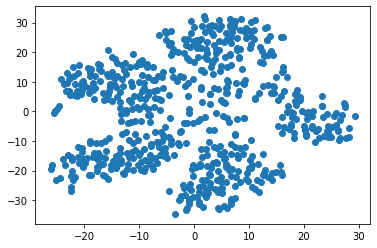

In [16]:
#Plot the t-SNE results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

## Part 3: Perform a Cluster Analysis with K-means

In [17]:
# calculate inertia for k value range
inertia = []
k= list(range(1,11))

for i in k:
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(myopia_pca_data)
    inertia.append(km.inertia_)

C:\Users\17sar\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [18]:
#create elbow curve data
elbow_data= {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


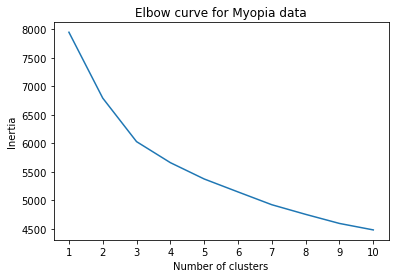

In [19]:
#plot elbow curve
plt.plot(elbow_df["k"], elbow_df["inertia"])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()

### Part 4: Make a Recommendation

#### Looking at the t-SNE scatter plot there appear to be 6 clusters, 5 outside clusters around a center cluster, and the elbow curve never really flattens out but could be slowing down around 7. Since neither model is clear in the number of clusters I would recommend not clustering the patients.